### `BY : Mohamed Ahmed Saad Abohassan`

### ` import Libaries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics



import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

In [2]:
df= pd.read_csv('Churn_Modelling.csv').drop(columns=['RowNumber'])

In [3]:
df2= pd.read_csv('Churn_Modelling.csv').drop(columns=['RowNumber'])


In [4]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
X_train,X_test = train_test_split(df, test_size=0.2, random_state=2022)

In [6]:
X_train.shape

(8000, 13)

In [7]:
X_test.shape

(2000, 13)

In [8]:
num_columns=list(set(X_train.describe().columns)-set(["CustomerId"]))
cat_columns=list(set(X_train.columns) - set(num_columns)- set(["CustomerId"])-set(["Surname"]))
len(cat_columns)

2

In [9]:
cat_columns

['Gender', 'Geography']

## `visualutions`

In [10]:
cat_columns

['Gender', 'Geography']

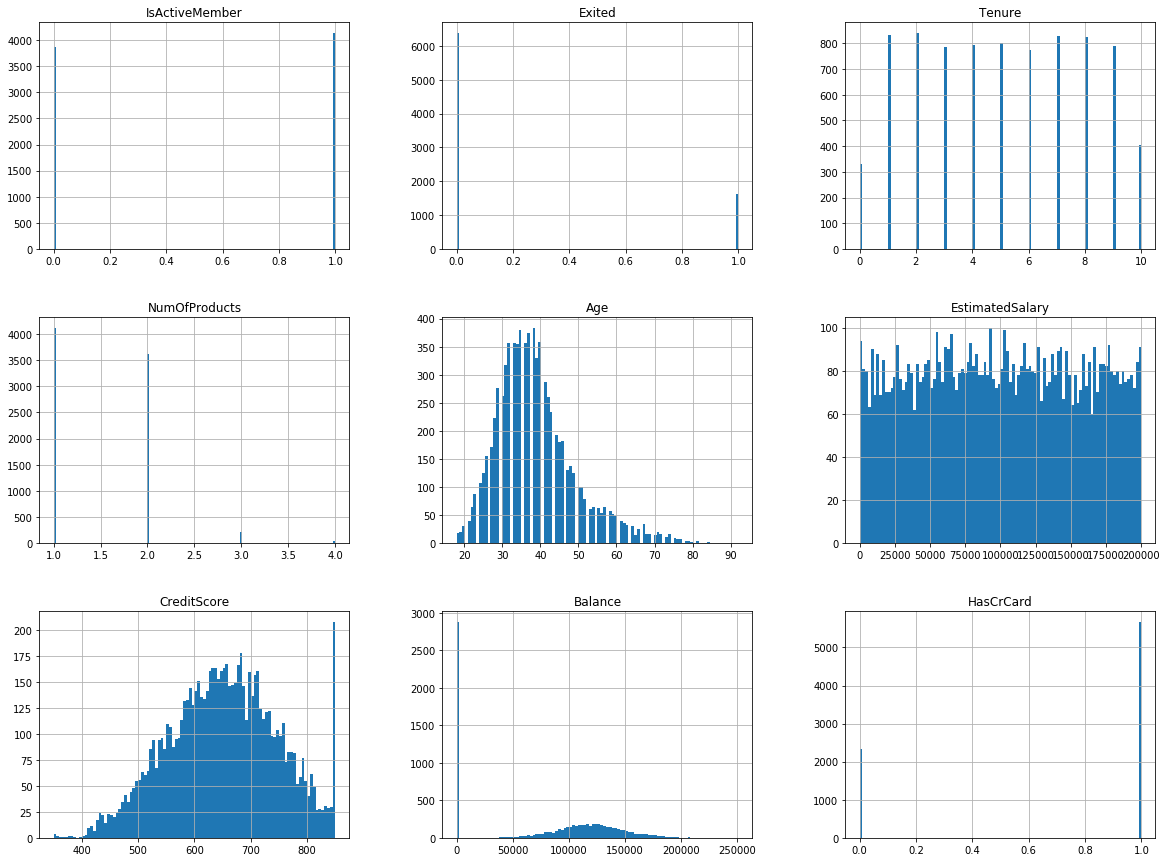

In [11]:
X_train[num_columns].hist(bins=100,figsize=(20,15));

In [12]:
#making dataframes each of them contains the categories of a catgegorical variable and theire frequencies
df_list=[]
for cat_column in cat_columns:
    df_list.append(X_train.groupby([cat_column])['CustomerId'].count().reset_index().rename(columns = {'CustomerId' : 'count'}))

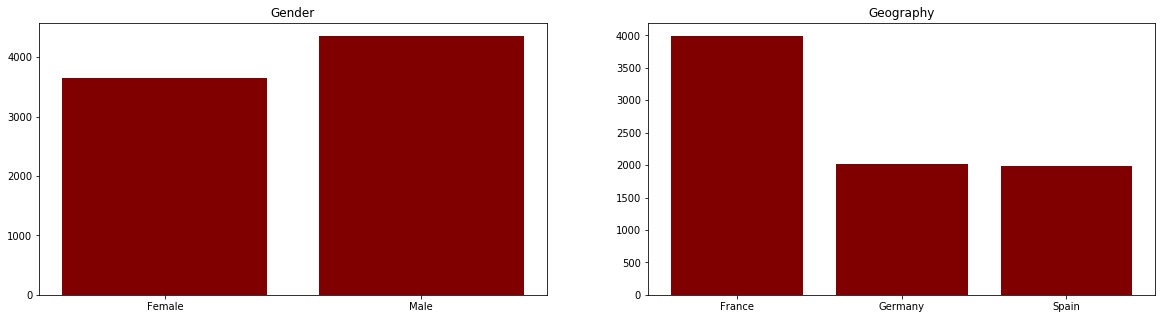

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
i=0
j=0
for df in df_list[0:10]:
    axes[j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[j].set_title(df.columns[0])
    if(j<1):
        j+=1
plt.show()

## `Data Preprocessing`

### `Dealing with nulls`

In [14]:
X_train.isna().sum().reset_index().rename(columns={0:"null_count"})

,index,null_count
0,CustomerId,0
1,Surname,0
2,CreditScore,0
3,Geography,0
4,Gender,0
5,Age,0
6,Tenure,0
7,Balance,0
8,NumOfProducts,0
9,HasCrCard,0


In [15]:
X_train.isna().sum().reset_index().rename(columns={0:"null_count"})

,index,null_count
0,CustomerId,0
1,Surname,0
2,CreditScore,0
3,Geography,0
4,Gender,0
5,Age,0
6,Tenure,0
7,Balance,0
8,NumOfProducts,0
9,HasCrCard,0


### `Dealing with redd cols`

In [16]:
th_count=X_train.shape[0]*0.8
columns_to_drop=[]
for col in num_columns :
    if X_train.groupby(by=col)['CustomerId'].count().reset_index().sort_values(by=['CustomerId'],ascending=False).iloc[0,1] >th_count:
            columns_to_drop.append(col)
            print(f"{col} is redondance ----droped")
X_train.drop(columns=columns_to_drop,inplace=True)
X_test.drop(columns=columns_to_drop,inplace=True)

In [17]:
columns_to_drop

[]

### `Dealing with skewness and outliers`

In [18]:
X_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5516,15569878,Dale,592,France,Male,37,3,96651.03,1,1,1,3232.82,0
1255,15615032,Peng,624,Spain,Male,46,3,0.00,2,1,1,62825.03,0
4319,15759456,Lupton,609,Spain,Male,34,7,140694.78,2,1,0,46266.63,0
9372,15775826,Iadanza,677,France,Male,30,1,78133.15,1,0,1,174225.88,0
1723,15567422,Chiazagomekpele,630,France,Male,42,6,0.00,2,1,0,162697.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,15812073,Palmer,529,France,Female,31,7,0.00,2,1,1,175697.87,0
4720,15780654,Sergeyev,619,Germany,Female,33,3,100488.92,2,0,1,36446.74,0
173,15586310,Ting,578,France,Male,30,4,169462.09,1,1,0,112187.11,0
1244,15616709,Bunton,587,Germany,Female,38,0,132122.42,2,0,0,31730.32,0


In [19]:
## separating the categorical features and numerical features
num_columns = list(set(X_train.describe().columns.to_list()) - set(['CustomerId', 'HasCrCard','IsActiveMember', 'Exited']))
cat_cols = list(set(X_train.columns.to_list()) - set(num_columns) - set(['CustomerId', 'HasCrCard','IsActiveMember', 'Exited']))

In [20]:
X_train[num_columns]

,Tenure,NumOfProducts,EstimatedSalary,Age,CreditScore,Balance
5516,3,1,3232.82,37,592,96651.03
1255,3,2,62825.03,46,624,0.00
4319,7,2,46266.63,34,609,140694.78
9372,1,1,174225.88,30,677,78133.15
1723,6,2,162697.93,42,630,0.00
...,...,...,...,...,...,...
6384,7,2,175697.87,31,529,0.00
4720,3,2,36446.74,33,619,100488.92
173,4,1,112187.11,30,578,169462.09
1244,0,2,31730.32,38,587,132122.42


In [21]:
X_train[num_columns]

,Tenure,NumOfProducts,EstimatedSalary,Age,CreditScore,Balance
5516,3,1,3232.82,37,592,96651.03
1255,3,2,62825.03,46,624,0.00
4319,7,2,46266.63,34,609,140694.78
9372,1,1,174225.88,30,677,78133.15
1723,6,2,162697.93,42,630,0.00
...,...,...,...,...,...,...
6384,7,2,175697.87,31,529,0.00
4720,3,2,36446.74,33,619,100488.92
173,4,1,112187.11,30,578,169462.09
1244,0,2,31730.32,38,587,132122.42


### ` Handling skewness and outliers`

In [22]:
##clamping_ouliers
for col in num_columns:

    Q1 = np.percentile(X_train[col], 25) 

    Q3 = np.percentile(X_train[col], 75) 
    IQR = Q3 - Q1 
    upper = Q3+5*IQR
    lower = Q1-5*IQR
    X_train[col][X_train[col]<lower]=lower
    X_train[col][X_train[col]>upper]=upper

    X_test[col][X_test[col]<lower]=lower
    X_test[col][X_test[col]>upper]=upper

In [23]:
m=X_train[num_columns].mean(axis=0)
std=X_train[num_columns].std(axis=0)
skewed_cols = []

sk_coff=((X_train[num_columns]-m)**3).sum(axis=0)/((X_train.shape[0]-1)* std**3)

i=0
for col in num_columns:
    if abs(sk_coff[i]>1):
        X_train[col]=np.log(np.abs(X_train[col]+1))
        X_test[col]=np.log(np.abs(X_test[col]+1))
        skewed_cols.append(col)
        print(f"{col} : removed skewness")
    i+=1


Age : removed skewness


In [24]:
skewed_cols

['Age']

In [25]:
sk_coff

Tenure             0.004287
NumOfProducts      0.774259
EstimatedSalary    0.006118
Age                1.018117
CreditScore       -0.068076
Balance           -0.142929
dtype: float64

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 5516 to 4989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       8000 non-null   int64  
 1   Surname          8000 non-null   object 
 2   CreditScore      8000 non-null   int64  
 3   Geography        8000 non-null   object 
 4   Gender           8000 non-null   object 
 5   Age              8000 non-null   float64
 6   Tenure           8000 non-null   int64  
 7   Balance          8000 non-null   float64
 8   NumOfProducts    8000 non-null   int64  
 9   HasCrCard        8000 non-null   int64  
 10  IsActiveMember   8000 non-null   int64  
 11  EstimatedSalary  8000 non-null   float64
 12  Exited           8000 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 875.0+ KB


In [27]:
X_train.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,1.569113e+07,650.897750,3.654376,5.028875,76696.045283,1.524500,0.708250,0.516750,99988.568160,0.203000
std,7.175830e+04,96.566583,0.252560,2.899800,62380.930567,0.582831,0.454596,0.499751,57388.439998,0.402258
min,1.556570e+07,350.000000,2.944439,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562882e+07,584.000000,3.496508,2.750000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000
50%,1.569189e+07,652.000000,3.637586,5.000000,97405.605000,1.000000,1.000000,1.000000,99812.150000,0.000000
75%,1.575292e+07,718.000000,3.806662,8.000000,127652.345000,2.000000,1.000000,1.000000,148955.820000,0.000000
max,1.581569e+07,850.000000,4.532599,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [28]:
X_train.shape

(8000, 13)

In [29]:
X_test.shape

(2000, 13)

### `checking if the variable is normally distributed`

In [30]:
num_columns

['Tenure', 'NumOfProducts', 'EstimatedSalary', 'Age', 'CreditScore', 'Balance']

In [31]:
cat_columns

['Gender', 'Geography']

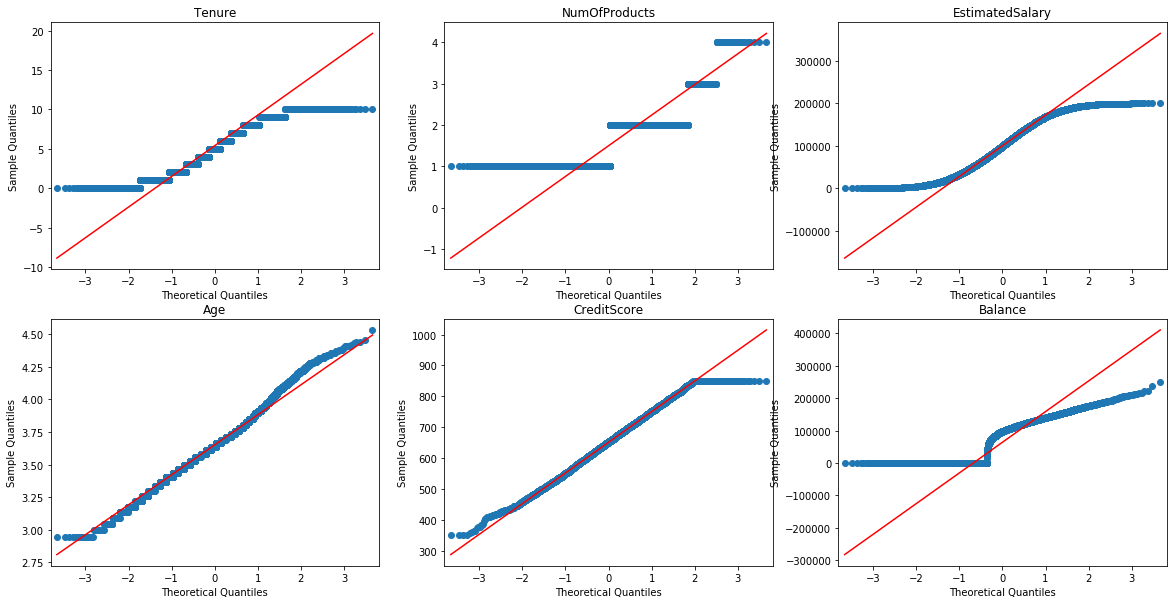

In [32]:
ncols = 3
nrows=2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20, 10))
i=0
j=0
for col in num_columns:
    sm.qqplot(X_train[col],fit = False, line='q', ax = axes[i, j])
    axes[i, j].set_title(col)
    if(j<ncols-1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

In [33]:

#chick for min_max_scale or std
feats_std_scale = []
feats_min_max_scale = []
sample_data  = X_train.sample(replace = False, n= 500)

for col in num_columns:
    stat, p = shapiro(sample_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.946, p=0.00000000
Tenure does not look Gaussian (reject H0)
W_Statistic=0.703, p=0.00000000
NumOfProducts does not look Gaussian (reject H0)
W_Statistic=0.959, p=0.00000000
EstimatedSalary does not look Gaussian (reject H0)
W_Statistic=0.993, p=0.01358434
Age looks like gaussian (fail to reject H0)
W_Statistic=0.992, p=0.00824749
CreditScore looks like gaussian (fail to reject H0)
W_Statistic=0.852, p=0.00000000
Balance does not look Gaussian (reject H0)


In [34]:
feats_std_scale

['Age', 'CreditScore']

In [35]:
feats_min_max_scale

['Tenure', 'NumOfProducts', 'EstimatedSalary', 'Balance']

In [36]:
X_train.shape

(8000, 13)

In [37]:
print("start scaling : \n  ")

if len(feats_min_max_scale) !=0 :
    min_max_scaler = MinMaxScaler()
    min_max_scaler_model = min_max_scaler.fit(X_train[feats_min_max_scale])
    min_max_scaled_data = pd.DataFrame(min_max_scaler_model.transform(X_train[feats_min_max_scale]), columns = feats_min_max_scale)
    min_max_scaled_test_data = pd.DataFrame(min_max_scaler_model.transform(X_test[feats_min_max_scale]), columns = feats_min_max_scale)

if len(feats_std_scale) !=0 :
    std_scaler = StandardScaler()
    std_scaler_model = std_scaler.fit(X_train[feats_std_scale])
    std_scaled_data =pd.DataFrame( std_scaler_model.transform(X_train[feats_std_scale]), columns = feats_std_scale)
    std_scaled_test_data =pd.DataFrame( std_scaler_model.transform(X_test[feats_std_scale]), columns = feats_std_scale)


if len(feats_min_max_scale) and len(feats_std_scale) !=0:  
    num_train_df = std_scaled_data.merge(min_max_scaled_data, right_index = True, left_index = True)\
                    .merge(X_train[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
    num_test_df = std_scaled_test_data.merge(min_max_scaled_test_data, right_index = True, left_index = True)\
                    .merge(X_test[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
    print(num_train_df.shape)

    print("----------done-------------")
    print("case1")
#         return num_train_df

if len(feats_min_max_scale) !=0 and len(feats_std_scale)==0: 
    print("----------done-------------")
    print("case2")
    num_train_df= min_max_scaled_data.merge(X_train[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
    num_test_df= min_max_scaled_test_data.merge(X_test[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
#         return num_train_df
if len(feats_std_scale) !=0 and len(feats_min_max_scale)==0:
    print("----------done-------------")
    print("case3")
    num_train_df= std_scaled_data.merge(X_train[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
    num_test_df=std_scaled_test_data.merge(X_test[['HasCrCard', 'Exited', 'IsActiveMember']], right_index = True, left_index = True)
#         return std_scaled_data



start scaling : 
  
(6409, 9)
----------done-------------
case1


In [38]:
X_train[['HasCrCard', 'Exited', 'IsActiveMember']]

,HasCrCard,Exited,IsActiveMember
5516,1,0,1
1255,1,0,1
4319,1,0,0
9372,0,0,1
1723,1,0,0
...,...,...,...
6384,1,0,1
4720,0,0,1
173,1,0,0
1244,0,0,0


In [39]:
X_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5516,15569878,Dale,592,France,Male,3.637586,3,96651.03,1,1,1,3232.82,0
1255,15615032,Peng,624,Spain,Male,3.850148,3,0.00,2,1,1,62825.03,0
4319,15759456,Lupton,609,Spain,Male,3.555348,7,140694.78,2,1,0,46266.63,0
9372,15775826,Iadanza,677,France,Male,3.433987,1,78133.15,1,0,1,174225.88,0
1723,15567422,Chiazagomekpele,630,France,Male,3.761200,6,0.00,2,1,0,162697.93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,15812073,Palmer,529,France,Female,3.465736,7,0.00,2,1,1,175697.87,0
4720,15780654,Sergeyev,619,Germany,Female,3.526361,3,100488.92,2,0,1,36446.74,0
173,15586310,Ting,578,France,Male,3.433987,4,169462.09,1,1,0,112187.11,0
1244,15616709,Bunton,587,Germany,Female,3.663562,0,132122.42,2,0,0,31730.32,0


In [40]:
std_scaled_data

,Age,CreditScore
0,-0.066483,-0.609957
1,0.775196,-0.278558
2,-0.392121,-0.433901
3,-0.872673,0.270320
4,0.422991,-0.216421
...,...,...
7995,-0.746958,-1.262397
7996,-0.506902,-0.330339
7997,-0.872673,-0.754943
7998,0.036372,-0.661738


In [41]:
num_train_df.shape

(6409, 9)

In [42]:
num_train_df.shape

(6409, 9)

In [43]:
X_train["Surname"]

5516               Dale
1255               Peng
4319             Lupton
9372            Iadanza
1723    Chiazagomekpele
             ...       
6384             Palmer
4720           Sergeyev
173                Ting
1244             Bunton
4989             Ozioma
Name: Surname, Length: 8000, dtype: object

In [44]:
X_train.shape

(8000, 13)

In [45]:
X_test.shape

(2000, 13)

In [46]:
# label encoding of the Gender

label_enc_model = LabelEncoder().fit(X_train['Gender'])
X_train['Gender'] = label_enc_model.transform(X_train['Gender'])
X_test['Gender'] = label_enc_model.transform(X_test['Gender'])

one_hot_enc_model = OneHotEncoder(sparse = False).fit(X_train[['Geography']])
ohe_train_data = one_hot_enc_model.transform(X_train[['Geography']])
ohe_test_data = one_hot_enc_model.transform(X_test[['Geography']])

a=one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_train_df = pd.DataFrame(ohe_train_data, columns = col_names)
nominal_test_df = pd.DataFrame(ohe_test_data, columns = col_names)

In [47]:
nominal_train_df

,France,Germany,Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
7995,1.0,0.0,0.0
7996,0.0,1.0,0.0
7997,1.0,0.0,0.0
7998,0.0,1.0,0.0


In [48]:
nominal_train_df = nominal_train_df.merge(X_train[['Gender',"Surname"]], right_index = True, left_index = True)
nominal_test_df = nominal_test_df.merge(X_test[['Gender',"Surname"]], right_index = True, left_index = True)

In [49]:
nominal_train_df.shape

(6409, 5)

In [50]:
nominal_test_df.shape

(397, 5)

In [51]:
final_train_data = nominal_train_df.merge(num_train_df, right_index = True, left_index = True, how = 'inner')

final_test_data = nominal_test_df.merge(num_test_df, right_index = True, left_index = True, how = 'inner')

In [52]:
final_train_data.shape

(6409, 14)

In [53]:
final_test_data.shape

(397, 14)

In [54]:
final_test_data

,France,Germany,Spain,Gender,Surname,Age,CreditScore,Tenure,NumOfProducts,EstimatedSalary,Balance,HasCrCard,Exited,IsActiveMember
22,1.0,0.0,0.0,0,Gerasimov,1.250931,0.643143,0.0,0.000000,0.231812,0.740905,1,1,0
25,1.0,0.0,0.0,1,Maclean,-0.280572,-1.003492,0.6,0.333333,0.476373,0.469143,0,0,1
28,1.0,0.0,0.0,0,McWilliams,-0.066483,0.860623,0.3,0.000000,0.386342,0.320400,1,0,1
29,1.0,0.0,0.0,1,Lucciano,0.858561,0.446375,0.4,0.333333,0.987680,0.000000,1,0,1
35,1.0,0.0,0.0,0,Lombardo,2.572572,-1.583439,0.2,0.333333,0.827061,0.678529,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1.0,0.0,0.0,1,Johnson,0.036372,-0.050722,0.2,0.333333,0.893791,0.000000,0,1,0
1982,0.0,0.0,1.0,1,Phillips,0.858561,1.243802,0.3,0.333333,0.539366,0.289616,1,0,0
1986,0.0,0.0,1.0,0,Lu,0.775196,0.725993,0.7,0.000000,0.339857,0.549759,0,0,0
1987,0.0,1.0,0.0,1,Yamamoto,0.690038,-2.277304,0.5,0.333333,0.184458,0.333301,0,1,1


### `dealing with imbalance`

In [55]:
rare_class_data = final_train_data[final_train_data['Exited'] == 1]
dominant_class_data = final_train_data[final_train_data['Exited'] == 0]

under_sampled_class = dominant_class_data.sample(frac = 0.25, replace = False, random_state = 2022)
train_undersampled = pd.concat((under_sampled_class, rare_class_data), axis = 0)

In [56]:
train_undersampled.shape

(2586, 14)

In [57]:
final_test_data

,France,Germany,Spain,Gender,Surname,Age,CreditScore,Tenure,NumOfProducts,EstimatedSalary,Balance,HasCrCard,Exited,IsActiveMember
22,1.0,0.0,0.0,0,Gerasimov,1.250931,0.643143,0.0,0.000000,0.231812,0.740905,1,1,0
25,1.0,0.0,0.0,1,Maclean,-0.280572,-1.003492,0.6,0.333333,0.476373,0.469143,0,0,1
28,1.0,0.0,0.0,0,McWilliams,-0.066483,0.860623,0.3,0.000000,0.386342,0.320400,1,0,1
29,1.0,0.0,0.0,1,Lucciano,0.858561,0.446375,0.4,0.333333,0.987680,0.000000,1,0,1
35,1.0,0.0,0.0,0,Lombardo,2.572572,-1.583439,0.2,0.333333,0.827061,0.678529,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977,1.0,0.0,0.0,1,Johnson,0.036372,-0.050722,0.2,0.333333,0.893791,0.000000,0,1,0
1982,0.0,0.0,1.0,1,Phillips,0.858561,1.243802,0.3,0.333333,0.539366,0.289616,1,0,0
1986,0.0,0.0,1.0,0,Lu,0.775196,0.725993,0.7,0.000000,0.339857,0.549759,0,0,0
1987,0.0,1.0,0.0,1,Yamamoto,0.690038,-2.277304,0.5,0.333333,0.184458,0.333301,0,1,1


In [58]:
# final_train_data, final_test_data
X_train_f = train_undersampled.drop(columns =['Exited'])
y_train_f = train_undersampled[['Exited']]

X_test_f = final_test_data.drop(columns =['Exited'])
y_test_f = final_test_data[['Exited']]

In [59]:
# final_train_data, final_test_data
X_train = train_undersampled.drop(columns =['Exited',"Surname"]).values
y_train = train_undersampled[['Exited']].values

X_test = final_test_data.drop(columns =['Exited',"Surname"]).values
y_test = final_test_data[['Exited']].values

In [60]:
X_train.shape

(2586, 12)

In [61]:
y_train.shape

(2586, 1)

In [62]:
X_test.shape

(397, 12)

In [63]:
y_test.shape

(397, 1)

## `Logistic Regression`

### `From scratch`

In [64]:
class MyLogisticRegression():
    def __init__( self, max_itr,alpha ) : 
        self.max_itr=max_itr
        self.alpha=alpha
    
    def fit(self,x_data,y_data):
        
        x_0=np.ones((x_data.shape[0],1))
        x=np.concatenate((x_0, x_data), axis=1)
        y=np.array(y_data).reshape(y_data.shape[0],1)
        theta=np.zeros( ((x.shape[1]),1) )
        m=x_data.shape[0]
        itr=0
        Z=x@theta
        while( itr< self.max_itr   ):
            h_theta=1/(1+np.exp(-Z))       
            err=(h_theta-y)
            grad= x.T@err/m
            theta=theta-(self.alpha*grad)
            Z=x@theta
            itr=itr+1
            
        self.theta=theta-(self.alpha*grad)
        
    
    
    def predict(self,x,threshold):
        self.threshold=threshold
        x_0=np.ones((x.shape[0],1))
        x=np.concatenate((x_0, x), axis=1)
        w=self.theta
        Z=x@w
        h_theta=1/(1+np.exp(-Z))
        y_predict= np.where( h_theta > threshold, 1, 0 )  
        return y_predict
    
    
    def score(self,y_pred,y):
#         y_predict=self.predict(x,self.threshold)
        score=accuracy_score(y_pred, y)
        return score
#         correctly =0
#         y=np.array(y).reshape(y.shape[0],1)
#         for i in range(y.shape[0]):
#             if y[i] == y_predict[i] :            
#                 correctly= correctly + 1
#                 i=i+1
#         print( "Accuracy   :  ", ( correctly / i ) * 100 )
#         print(f'Number of correct predictions = {correctly}, Number of uncorrect predictions = {i-correctly} : out of {y.shape[0] } prediction ') 

    

In [65]:
my_model=MyLogisticRegression(1000,0.15)


In [66]:
my_model.fit(X_train, y_train)

In [67]:
threshold=0.4517796729006606

In [68]:
y_predict=my_model.predict(X_test,threshold=threshold)


In [69]:
my_model.score(y_predict,y_test)

0.5163727959697733

### `From Sklearn`

In [70]:
model = LogisticRegression(max_iter= 100, fit_intercept= True).fit(X_train, y_train)

y_pred_sklearn = model.predict(X_test)


In [71]:
y_pred_new_threshold = (model.predict_proba(X_test)[:,1]>=threshold).astype(int)
# y_pred_sklearn_train= (model.predict_proba(X_train)[:,1]>=threshold).astype(int)

accuracy_score(y_pred_new_threshold, y_test)

0.5163727959697733

In [72]:
recall_score(y_test, y_pred_new_threshold)


0.7586206896551724

### `Evaluating the performance of the model for testing`

In [73]:
confusion_matrix(y_test, y_pred_new_threshold)

array([[139, 171],
       [ 21,  66]], dtype=int64)

In [74]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_new_threshold).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
conf_matrix

,actual_not_churn,actual_churn
predicted_not_churn,139,21
predicted_churn,171,66


In [75]:
people_predicted_not_churn = conf_matrix.iloc[0, :].sum()
people_predicted_churn = conf_matrix.iloc[1, :].sum()

people_who_actually_not_churned = conf_matrix.sum()[0]
people_who_actually_churned = conf_matrix.sum()[1]

precision_not_churn = conf_matrix.iloc[0, 0]/people_predicted_not_churn
precision_churn = conf_matrix.iloc[1, 1]/people_predicted_churn

recall_not_churn = conf_matrix.iloc[0, 0]/people_who_actually_not_churned
recall_churn = conf_matrix.iloc[1, 1]/people_who_actually_churned

F1_score_not_churn = 2 * ((precision_not_churn * recall_not_churn)/(precision_not_churn + recall_not_churn))
F1_score_churn = 2 * ((precision_churn * recall_churn)/(precision_churn + recall_churn))

In [76]:
print("people_predicted_not_churn :" ,people_predicted_not_churn)
print("people_predicted_churn: ",people_predicted_churn)
print("people_who_actually_not_churned: ",people_who_actually_not_churned)
print("people_who_actually_churned: ",people_who_actually_churned)
print("-------------")
print('precision_not_churn: ', precision_not_churn)
print('recall_not_churn: ', recall_not_churn)
print("-------------")
print('precision_churn: ', precision_churn)
print('recall_churn: ', recall_churn)
print("-------------")
print('F1_score_not_churn: ', F1_score_not_churn)
print('F1_score_churn: ', F1_score_churn)

people_predicted_not_churn : 160
people_predicted_churn:  237
people_who_actually_not_churned:  310
people_who_actually_churned:  87
-------------
precision_not_churn:  0.86875
recall_not_churn:  0.4483870967741935
-------------
precision_churn:  0.27848101265822783
recall_churn:  0.7586206896551724
-------------
F1_score_not_churn:  0.5914893617021276
F1_score_churn:  0.4074074074074074


### `ROC Curve_test`

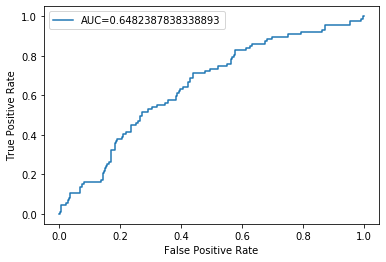

In [77]:
y_pred_proba = model.predict_proba(X_test)[::, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve showing in the bottom the AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=2)
plt.show()

In [78]:
# recall >= 75% for churn
thresholds[np.where(tpr >= 0.75)[0][0]]

0.4517796729006638

### `Evaluating the performance of the model for training`

In [79]:
model = LogisticRegression(max_iter= 100, fit_intercept= True).fit(X_train, y_train)
# y_pred_sklearn = model.predict(X_test)

In [80]:
threshold=0.47923656658655867

In [81]:
y_pred_sklearn_train= (model.predict_proba(X_train)[:,1]>=threshold).astype(int)


In [82]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
conf_matrix_train

,actual_not_churn,actual_churn
predicted_not_churn,676,411
predicted_churn,598,901


In [83]:
people_predicted_not_churn = conf_matrix_train.iloc[0, :].sum()
people_predicted_churn = conf_matrix_train.iloc[1, :].sum()

people_who_actually_not_churned = conf_matrix_train.sum()[0]
people_who_actually_churned = conf_matrix_train.sum()[1]

precision_not_churn = conf_matrix_train.iloc[0, 0]/people_predicted_not_churn
precision_churn = conf_matrix_train.iloc[1, 1]/people_predicted_churn

recall_not_churn = conf_matrix_train.iloc[0, 0]/people_who_actually_not_churned
recall_churn = conf_matrix_train.iloc[1, 1]/people_who_actually_churned

F1_score_not_churn = 2 * ((precision_not_churn * recall_not_churn)/(precision_not_churn + recall_not_churn))
F1_score_churn = 2 * ((precision_churn * recall_churn)/(precision_churn + recall_churn))

In [84]:
print("people_predicted_not_churn :" ,people_predicted_not_churn)
print("people_predicted_churn: ",people_predicted_churn)
print("people_who_actually_not_churned: ",people_who_actually_not_churned)
print("people_who_actually_churned: ",people_who_actually_churned)
print("-------------")
print('precision_not_churn: ', precision_not_churn)
print('recall_not_churn: ', recall_not_churn)
print("-------------")
print('precision_churn: ', precision_churn)
print('recall_churn: ', recall_churn)
print("-------------")
print('F1_score_not_churn: ', F1_score_not_churn)
print('F1_score_churn: ', F1_score_churn)

people_predicted_not_churn : 1087
people_predicted_churn:  1499
people_who_actually_not_churned:  1274
people_who_actually_churned:  1312
-------------
precision_not_churn:  0.6218951241950322
recall_not_churn:  0.5306122448979592
-------------
precision_churn:  0.6010673782521682
recall_churn:  0.6867378048780488
-------------
F1_score_not_churn:  0.5726387124099958
F1_score_churn:  0.64105300604767


### `ROC Curve_train`

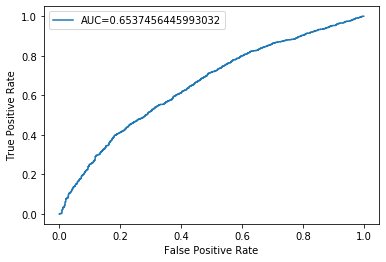

In [85]:
y_pred_proba = model.predict_proba(X_train)[::, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_proba)

auc = metrics.roc_auc_score(y_train, y_pred_proba)

#create ROC curve showing in the bottom the AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=2)
plt.show()

In [86]:
tpr

array([0.00000000e+00, 7.62195122e-04, 7.62195122e-04, ...,
       9.99237805e-01, 1.00000000e+00, 1.00000000e+00])

In [87]:
# recall >= 75% for churn
thresholds[np.where(tpr >= 0.6867)[0][0]]

0.47923656658750063

### `get list of the names of churns `

In [88]:
def get_names(y,x,col_name):
    y=pd.DataFrame(y)
    y=y.replace(1,True)
    y=y.replace(0,False)
    y=np.array(y)
    y=y.reshape(y.shape[0],)
    y=pd.Series(y, copy=False)
    names_test=list(x.reset_index().drop(columns="index")[y][col_name])
    return names_test

In [89]:
names_train=get_names(y_pred_sklearn_train,X_train_f,"Surname")
len(names_train)

1499

In [90]:
names_train=np.array(names_train)
names_train

array(['Mirams', 'Paterson', 'Andrews', ..., 'Gallo', 'Sullivan',
       'Iloerika'], dtype='<U23')

In [91]:
names_test=get_names(y_pred_new_threshold,X_test_f,"Surname")
len(names_test)

237

## `SVM `

In [92]:
from sklearn.svm import SVC

In [93]:
ranges=np.random.rand(15)
ranges

array([0.81783595, 0.37840576, 0.06451803, 0.0508999 , 0.21836255,
       0.0327945 , 0.96676712, 0.06859195, 0.79346311, 0.13987621,
       0.49158912, 0.60884689, 0.79090458, 0.0837166 , 0.41760988])

In [94]:
np.random.rand(5)

array([0.47052408, 0.27447057, 0.29626425, 0.37914942, 0.36417959])

In [95]:
ranges=[0.01,0.1,1,10,100,1000]

In [96]:
#search for best c for linear kernel
ranges=[0.01,0.1,1,10,100,1000]
scores=[]
for i in ranges:
    clf = SVC(C=i,kernel='linear',)
    clf.fit(X_train, y_train)
    y_pred_sklearn_svc_train = clf.predict(X_train)
    score=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1] 
    scores.append(score)
    print(f'the recall is {score} at c = {i}')


the recall is 0.6516768292682927 at c = 0.01
the recall is 0.6516768292682927 at c = 0.1
the recall is 0.6516768292682927 at c = 1
the recall is 0.6516768292682927 at c = 10
the recall is 0.6516768292682927 at c = 100
the recall is 0.6516768292682927 at c = 1000


In [103]:
# c=ranges[scores.index(min(scores))]
# c

In [98]:
# there is no effect for c at linear kernel 

In [102]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [104]:
#search for best c  and gamma for rbf kernel
range_c=[0.001,0.01,0.1,1,10]

range_gama=[0.001,0.01,0.1,1,10]

scores=[]
for i in range_c:
    for j in range_gama :
    
        clf = SVC(C=i,kernel='rbf',gamma=j)
        clf.fit(X_train, y_train)
        y_pred_sklearn_svc_train = clf.predict(X_train)
        score=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1] 
        scores.append(score)
        conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
        people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()
        people_who_actually_churned = conf_matrix_train_svc.sum()[1]

        if people_predicted_churn <1500 and people_predicted_churn >=1400 :
            
            print(f'the recall is {score:0.4f} at c = {i} and gama={j},people_predicted_churn={people_predicted_churn} ,people_who_actually_churned ={people_who_actually_churned}')
#         print(f'the recall is {score} at c = {i} and gama={j}')
# alpha=ranges[scores.index(min(scores))]

the recall is 0.7233 at c = 0.1 and gama=1,people_predicted_churn=1448 ,people_who_actually_churned =1312
the recall is 0.6517 at c = 1 and gama=0.01,people_predicted_churn=1400 ,people_who_actually_churned =1312
the recall is 0.6517 at c = 1 and gama=0.1,people_predicted_churn=1400 ,people_who_actually_churned =1312
the recall is 0.6517 at c = 10 and gama=0.001,people_predicted_churn=1400 ,people_who_actually_churned =1312
the recall is 0.6517 at c = 10 and gama=0.01,people_predicted_churn=1400 ,people_who_actually_churned =1312


In [198]:
# the recall is 0.7233 at c = 0.1 and gama=1,people_predicted_churn=1448 ,people_who_actually_churned =1312


In [106]:
new_c=np.arange(0.1,0.2,0.01)
new_gama=np.arange(0.01,1,0.1)
new_gama

array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])

In [107]:
#search for best c  and gamma for rbf kernel
# range_c=[0.001,0.01,0.1,1,10,100]

# range_gama=range_c=[0.001,0.01,0.1,1,10,100]

scores=[]
for i in new_c:
    for j in new_gama :
    
        clf = SVC(C=i,kernel='rbf',gamma=j)
        clf.fit(X_train, y_train)
        y_pred_sklearn_svc_train = clf.predict(X_train)
        score=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1] 
        scores.append(score)
        conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
        people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()
        people_who_actually_churned = conf_matrix_train_svc.sum()[1]

        if people_predicted_churn <1500 and people_predicted_churn >=1400 :
            
            print(f'the recall is {score:0.4f} at c = {i} and gama={j},people_predicted_churn={people_predicted_churn} ,people_who_actually_churned ={people_who_actually_churned}')
#         print(f'the recall is {score} at c = {i} and gama={j}')
# alpha=ranges[scores.index(min(scores))]

the recall is 0.6784 at c = 0.18999999999999995 and gama=0.01,people_predicted_churn=1478 ,people_who_actually_churned =1312


In [201]:
# the recall is 0.6784 at c = 0.18999999999999995 and gama=0.01,people_predicted_churn=1478 ,people_who_actually_churned =1312

#189184312852679

In [96]:
clf = SVC(C=0.18999999999999995,kernel='rbf',gamma=.01)
clf.fit(X_train, y_train)
y_pred_sklearn_svc_train = clf.predict(X_train)
recall_train=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1]
print('recall_train',recall_train)
y_pred_sklearn_svc = clf.predict(X_test)
recall_test=recall_score(y_test, y_pred_sklearn_svc, average=None)[1]
print('recall_test',recall_test)
conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()
people_who_actually_churned = conf_matrix_train_svc.sum()[1]
people_who_actually_churned,people_predicted_churn

recall_train 0.6783536585365854
recall_test 0.7241379310344828


(1312, 1478)

In [97]:
conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
conf_matrix_train_svc

,actual_not_churn,actual_churn
predicted_not_churn,686,422
predicted_churn,588,890


In [98]:
people_predicted_not_churn = conf_matrix_train_svc.iloc[0, :].sum()
people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()

people_who_actually_not_churned = conf_matrix_train_svc.sum()[0]
people_who_actually_churned = conf_matrix_train_svc.sum()[1]

precision_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_predicted_not_churn
precision_churn = conf_matrix_train_svc.iloc[1, 1]/people_predicted_churn

recall_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_who_actually_not_churned
recall_churn = conf_matrix_train_svc.iloc[1, 1]/people_who_actually_churned

F1_score_not_churn = 2 * ((precision_not_churn * recall_not_churn)/(precision_not_churn + recall_not_churn))
F1_score_churn = 2 * ((precision_churn * recall_churn)/(precision_churn + recall_churn))

In [99]:
print("people_predicted_not_churn :" ,people_predicted_not_churn)
print("people_predicted_churn: ",people_predicted_churn)
print("people_who_actually_not_churned: ",people_who_actually_not_churned)
print("people_who_actually_churned: ",people_who_actually_churned)
print("-------------")
print('precision_not_churn: ', precision_not_churn)
print('recall_not_churn: ', recall_not_churn)
print("-------------")
print('precision_churn: ', precision_churn)
print('recall_churn: ', recall_churn)
print("-------------")
print('F1_score_not_churn: ', F1_score_not_churn)
print('F1_score_churn: ', F1_score_churn)

people_predicted_not_churn : 1108
people_predicted_churn:  1478
people_who_actually_not_churned:  1274
people_who_actually_churned:  1312
-------------
precision_not_churn:  0.6191335740072202
recall_not_churn:  0.5384615384615384
-------------
precision_churn:  0.6021650879566982
recall_churn:  0.6783536585365854
-------------
F1_score_not_churn:  0.5759865659109992
F1_score_churn:  0.6379928315412187


In [100]:
names_train=np.array(get_names(y_pred_sklearn_svc_train,X_train_f,"Surname"))
(names_train)

array(['Mirams', 'Paterson', 'Andrews', ..., 'Gallo', 'Sullivan',
       'Iloerika'], dtype='<U23')

In [101]:
range_d=np.arange(1,5)
range_d

array([1, 2, 3, 4])

In [ ]:
#search for best c ,gamma and degree for Polynomial  kernel
range_d=np.arange(1,4)

range_c=[0.001,0.01,0.1,1,5]

range_gama=[0.001,0.01,0.1,1,5]

scores=[]
for n in range_d:
    for i in range_c:
        for j in range_gama :

            clf = SVC(C=i,kernel='poly',gamma=j,degree=n)
            clf.fit(X_train, y_train)
            y_pred_sklearn_svc_train = clf.predict(X_train)
            score=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1] 
            scores.append(score)
            conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
            people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()
            people_who_actually_churned = conf_matrix_train_svc.sum()[1]

            if people_predicted_churn <1500 and people_predicted_churn >=1400 :
                print(f'the recall is {score:0.3f} at c = {i} and gama={j},people_predicted_churn={people_predicted_churn} ,people_who_actually_churned ={people_who_actually_churned} and degree = {n}')
    #         print(f'the recall is {score} at c = {i} and gama={j}')
    # alpha=ranges[scores.index(min(scores))]

the recall is 0.652 at c = 0.001 and gama=5,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 0.01 and gama=1,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 0.01 and gama=5,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 0.1 and gama=0.1,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 0.1 and gama=1,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 0.1 and gama=5,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 1 and gama=0.01,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 1 and gama=0.1,people_predicted_churn=1400 ,people_who_actually_churned =1312 and degree = 1
the recall is 0.652 at c = 1 and 

In [124]:
clf = SVC(C=2.4,kernel='poly',gamma=0.1,degree=3)
clf.fit(X_train, y_train)
y_pred_sklearn_svc_train = clf.predict(X_train)
score=recall_score(y_train, y_pred_sklearn_svc_train, average=None)[1] 
conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})
people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()
people_who_actually_churned = conf_matrix_train_svc.sum()[1]
print(f'the recall is {score:0.3f} ,people_predicted_churn={people_predicted_churn} ,people_who_actually_churned ={people_who_actually_churned} ')

the recall is 0.693 ,people_predicted_churn=1500 ,people_who_actually_churned =1312 


In [125]:
conf_matrix_train_svc

,actual_not_churn,actual_churn
predicted_not_churn,683,403
predicted_churn,591,909


In [126]:
people_predicted_not_churn = conf_matrix_train_svc.iloc[0, :].sum()
people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()

people_who_actually_not_churned = conf_matrix_train_svc.sum()[0]
people_who_actually_churned = conf_matrix_train_svc.sum()[1]

precision_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_predicted_not_churn
precision_churn = conf_matrix_train_svc.iloc[1, 1]/people_predicted_churn

recall_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_who_actually_not_churned
recall_churn = conf_matrix_train_svc.iloc[1, 1]/people_who_actually_churned

F1_score_not_churn = 2 * ((precision_not_churn * recall_not_churn)/(precision_not_churn + recall_not_churn))
F1_score_churn = 2 * ((precision_churn * recall_churn)/(precision_churn + recall_churn))

In [127]:
print("people_predicted_not_churn :" ,people_predicted_not_churn)
print("people_predicted_churn: ",people_predicted_churn)
print("people_who_actually_not_churned: ",people_who_actually_not_churned)
print("people_who_actually_churned: ",people_who_actually_churned)
print("-------------")
print('precision_not_churn: ', precision_not_churn)
print('recall_not_churn: ', recall_not_churn)
print("-------------")
print('precision_churn: ', precision_churn)
print('recall_churn: ', recall_churn)
print("-------------")
print('F1_score_not_churn: ', F1_score_not_churn)
print('F1_score_churn: ', F1_score_churn)

people_predicted_not_churn : 1086
people_predicted_churn:  1500
people_who_actually_not_churned:  1274
people_who_actually_churned:  1312
-------------
precision_not_churn:  0.6289134438305709
recall_not_churn:  0.5361067503924647
-------------
precision_churn:  0.606
recall_churn:  0.6928353658536586
-------------
F1_score_not_churn:  0.5788135593220339
F1_score_churn:  0.6465149359886202


In [130]:
names_train=np.array(get_names(y_pred_sklearn_svc_train,X_train_f,"Surname"))
(names_train)

array(['Mirams', 'Paterson', 'Andrews', ..., 'Sullivan', 'Foster',
       'Iloerika'], dtype='<U23')

### `Plots for  RBF kernel SVM VS C`

In [131]:
from sklearn.metrics import f1_score

In [163]:
new_c=np.arange(0.1,0.2,0.01)
# new_gama=np.arange(0.01,1,0.1)
new_c=[0.001,.01,0.1,1,5,10,50,100]
scores_train=[]
scores_test=[]

for i in new_c:
    
        clf = SVC(C=i,kernel='rbf')
        clf.fit(X_train, y_train)
        y_pred_sklearn_svc_train = clf.predict(X_train)
        y_pred_sklearn_svc_test = clf.predict(X_test)

        score_train=f1_score(y_train, y_pred_sklearn_svc_train, average=None)[1]
        score_test=f1_score(y_test, y_pred_sklearn_svc_test, average=None)[1] 
        scores_train.append(score_train)
        scores_test.append(score_test)

        

In [164]:
clf = SVC(C=3,kernel='rbf')
clf.fit(X_train, y_train)
# y_pred_sklearn_svc_train = clf.predict(X_train)
y_pred_sklearn_svc_test = clf.predict(X_test)
score_test=f1_score(y_test, y_pred_sklearn_svc_test, average=None)[1] 
score_test

0.4059040590405904

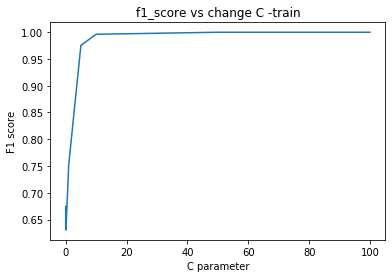

In [185]:
plt.plot(new_c,scores_train);
plt.title("f1_score vs change C -train");
plt.xlabel("C parameter")
plt.ylabel("F1 score");


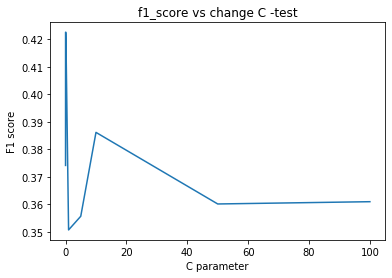

In [184]:
plt.plot(new_c,scores_test);
plt.title("f1_score vs change C -test");
plt.xlabel("C parameter")
plt.ylabel("F1 score");

### `Plots for  RBF kernel SVM VS gamma`

In [172]:

new_gama=[0.001,.01,0.1,1,5,10,50,100]
scores_train=[]
scores_test=[]

# for i in new_c:
for j in new_gama :
    
        clf = SVC(kernel='rbf',gamma=j)
        clf.fit(X_train, y_train)
        y_pred_sklearn_svc_train = clf.predict(X_train)
        y_pred_sklearn_svc_test = clf.predict(X_test)

        score_train=f1_score(y_train, y_pred_sklearn_svc_train, average=None)[1]
        score_test=f1_score(y_test, y_pred_sklearn_svc_test, average=None)[1] 
        scores_train.append(score_train)
        scores_test.append(score_test)

        

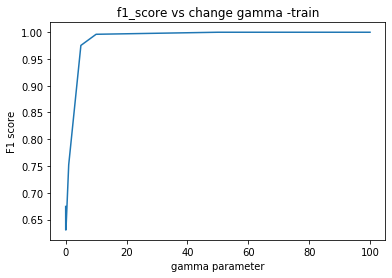

In [186]:
plt.plot(new_c,scores_train);
plt.title("f1_score vs change gamma -train");
plt.xlabel("gamma parameter")
plt.ylabel("F1 score");

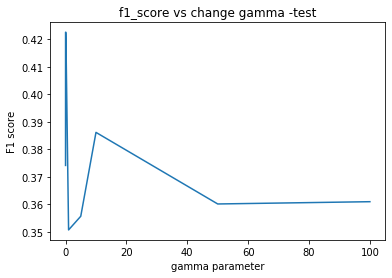

In [187]:
plt.plot(new_c,scores_test);
plt.title("f1_score vs change gamma -test");
plt.xlabel("gamma parameter")
plt.ylabel("F1 score");

### `Compare the best setting`

#### `for LR `

In [192]:
model = LogisticRegression(max_iter= 100, fit_intercept= True).fit(X_train, y_train)
threshold=0.47923656658655867
y_pred_sklearn_train= (model.predict_proba(X_train)[:,1]>=threshold).astype(int)
names_train=get_names(y_pred_sklearn_train,X_train_f,"Surname")
print(len(names_train))
pd.Series(names_train)

1499


0          Mirams
1        Paterson
2         Andrews
3       Tomlinson
4           Clark
          ...    
1494      Hancock
1495           Su
1496        Gallo
1497     Sullivan
1498     Iloerika
Length: 1499, dtype: object

#### `for SVM`

In [193]:
clf = SVC(C=2.4,kernel='poly',gamma=0.1,degree=3)
clf.fit(X_train, y_train)
y_pred_sklearn_svc_train = clf.predict(X_train)
names_train=get_names(y_pred_sklearn_svc_train,X_train_f,"Surname")
print(len(names_train))
pd.Series(names_train)

1500


0          Mirams
1        Paterson
2         Andrews
3       Tomlinson
4           Clark
          ...    
1495           Su
1496        Gallo
1497     Sullivan
1498       Foster
1499     Iloerika
Length: 1500, dtype: object

### `summary`

~~ we want a model which find a list of churners  but list does not exceed 1500 customers  and actually churned  aprox 1300 customers 
, the best model fulfilled the requirements  is the SVM with poly kernel

In [196]:
conf_matrix_train_svc = pd.DataFrame(confusion_matrix(y_train, y_pred_sklearn_svc_train).T,index=['predicted_not_churn', 'predicted_churn']).rename(columns = {0 : 'actual_not_churn', 1: 'actual_churn'})

In [197]:
people_predicted_not_churn = conf_matrix_train_svc.iloc[0, :].sum()
people_predicted_churn = conf_matrix_train_svc.iloc[1, :].sum()

people_who_actually_not_churned = conf_matrix_train_svc.sum()[0]
people_who_actually_churned = conf_matrix_train_svc.sum()[1]

precision_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_predicted_not_churn
precision_churn = conf_matrix_train_svc.iloc[1, 1]/people_predicted_churn

recall_not_churn = conf_matrix_train_svc.iloc[0, 0]/people_who_actually_not_churned
recall_churn = conf_matrix_train_svc.iloc[1, 1]/people_who_actually_churned

F1_score_not_churn = 2 * ((precision_not_churn * recall_not_churn)/(precision_not_churn + recall_not_churn))
F1_score_churn = 2 * ((precision_churn * recall_churn)/(precision_churn + recall_churn))




In [198]:
print("people_predicted_not_churn :" ,people_predicted_not_churn)
print("people_predicted_churn: ",people_predicted_churn)
print("people_who_actually_not_churned: ",people_who_actually_not_churned)
print("people_who_actually_churned: ",people_who_actually_churned)
print("-------------")
print('precision_not_churn: ', precision_not_churn)
print('recall_not_churn: ', recall_not_churn)
print("-------------")
print('precision_churn: ', precision_churn)
print('recall_churn: ', recall_churn)
print("-------------")
print('F1_score_not_churn: ', F1_score_not_churn)
print('F1_score_churn: ', F1_score_churn)

people_predicted_not_churn : 1086
people_predicted_churn:  1500
people_who_actually_not_churned:  1274
people_who_actually_churned:  1312
-------------
precision_not_churn:  0.6289134438305709
recall_not_churn:  0.5361067503924647
-------------
precision_churn:  0.606
recall_churn:  0.6928353658536586
-------------
F1_score_not_churn:  0.5788135593220339
F1_score_churn:  0.6465149359886202
